In [84]:
import pandas as pd
import numpy as np
data = pd.read_csv('train.csv')
data.drop('Id', axis=1, inplace=True)
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,...,3,0,12,2,11,7,6,7,4,1
1,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,...,3,2,7,2,3,2,1,1,2,1
2,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,3,0,12,3,9,7,7,3,5,1
3,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,...,3,0,18,2,7,7,1,7,4,1
4,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,...,3,1,10,2,10,7,7,8,1,1


In [85]:
X = data.drop(['Attrition'], axis=1)
y = data['Attrition']
Cat_col = [col for col in X.columns if X[col].dtype=='object']
Cat_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [86]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe_X = pd.DataFrame(ohe.fit_transform(X[Cat_col]))
ohe_X.index = X.index
X_num = X.drop(Cat_col, axis=1)
X_training = pd.concat([X_num, ohe_X], axis=1)
X_training.head()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,18,19,20,21,22,23,24,25,26,27
0,30,2,3,571,3,3,4,2564,0,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,36,12,4,1614,3,3,3,4663,9,12,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,55,2,1,842,3,3,4,5160,4,16,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,39,24,1,2014,1,3,4,4108,7,13,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,37,3,3,689,3,3,3,9434,1,15,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [87]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_training,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [88]:
print(model.feature_importances_)

[0.03521446 0.03447494 0.026872   0.02705387 0.03167139 0.02375461
 0.03311019 0.03821824 0.02615734 0.02673828 0.01324204 0.03205202
 0.0353707  0.02563571 0.0300278  0.03440165 0.02628149 0.0297234
 0.02813794 0.         0.00902265 0.02115104 0.0143572  0.00481124
 0.01347856 0.01156666 0.00308874 0.017456   0.01020413 0.01779102
 0.00708965 0.01474703 0.01754418 0.01687574 0.01204494 0.00430768
 0.01524034 0.00659236 0.01339659 0.00776245 0.01254742 0.01202064
 0.02124627 0.0118912  0.01628515 0.02948852 0.04806258 0.05179194]


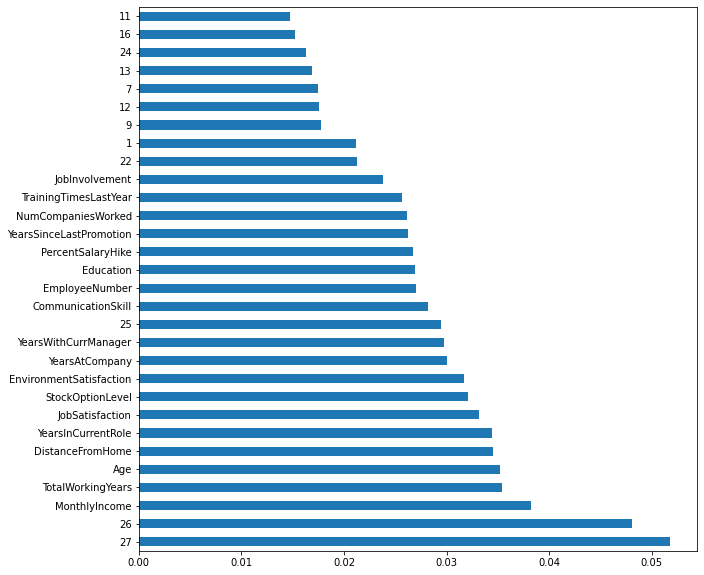

In [90]:
feat_importances = pd.Series(model.feature_importances_, index=X_training.columns)

plt.figure(figsize=(10,10))
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [91]:
top30 = list(feat_importances.nlargest(30).index)

In [92]:
X_top30 = X_training[top30]
X_top30.head()

,27,26,MonthlyIncome,TotalWorkingYears,Age,DistanceFromHome,YearsInCurrentRole,JobSatisfaction,StockOptionLevel,EnvironmentSatisfaction,...,JobInvolvement,22,1,9,12,7,13,24,16,11
0,0.0,1.0,2564,12,30,2,7,4,0,3,...,3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,4663,7,36,12,2,3,2,3,...,3,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,5160,12,55,2,7,4,0,3,...,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,4108,18,39,24,7,4,0,1,...,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1.0,9434,10,37,3,7,3,1,3,...,3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_top30, y, test_size=0.3, random_state=420)

In [94]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=90, criterion='entropy', random_state=420)
model.fit(X_train, y_train)
predict_train = model.predict_proba(X_train)[:,1]
predict_test  = model.predict_proba(X_test)[:,1]

In [95]:
model.score(X_test, y_test)

0.9795501022494888

In [96]:
test_ = pd.read_csv('test.csv')
test = test_.drop('Id', axis=1)
test.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,3,...,4,1,5,3,5,2,0,4,5,1
1,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,4,...,4,2,13,4,7,7,5,7,3,1
2,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,4,...,3,2,13,2,7,7,6,7,4,1
3,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,2,...,3,1,8,4,4,3,0,2,5,1
4,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,3,...,3,0,9,5,9,7,0,8,2,1


In [97]:
ohe_test = pd.DataFrame(ohe.fit_transform(test[Cat_col]))
ohe_test.index = test.index
test_num = test.drop(Cat_col, axis=1)
test_data = pd.concat([test_num, ohe_test], axis=1)

test_data_top30 = test_data[top30]

In [98]:
prediction = model.predict_proba(test_data_top30)[:,1]

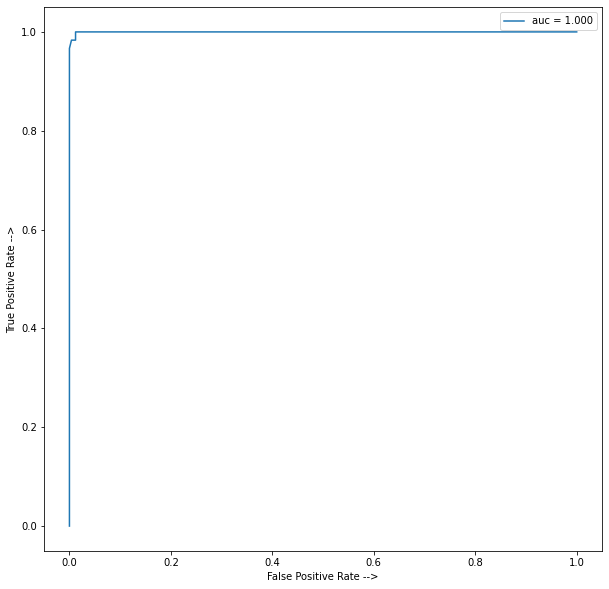

In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, predict_test)
auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, linestyle='-', label='auc = %0.3f'%auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

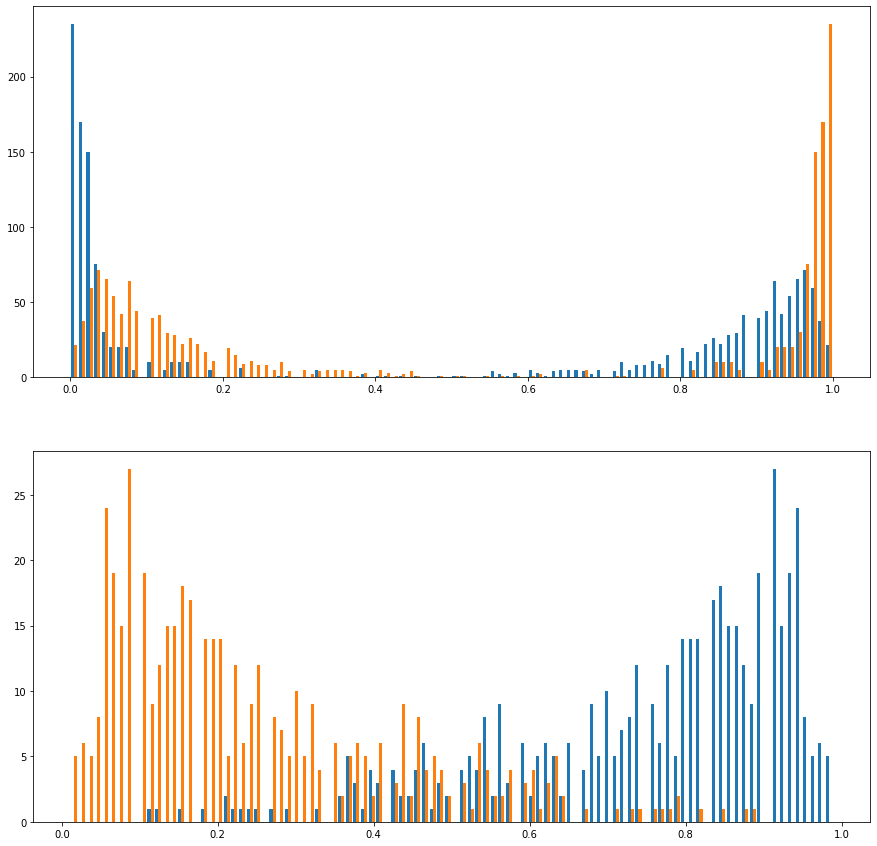

In [102]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,15))

ax1.hist(model.predict_proba(X_top30),bins=100)
ax2.hist(model.predict_proba(test_data_top30), bins=100)
plt.show()

In [103]:
output = pd.Series(prediction)
output_final = pd.concat([test_['Id'], output], axis=1)
output_final.columns=['Id', 'Attrition']
output_final.set_index('Id',inplace=True)
output_final.describe()

,Attrition
count,470.000000
mean,0.246667
std,0.183779
min,0.011111
25%,0.100000
50%,0.188889
75%,0.344444
max,0.888889
